# Ui-Wing Cheah
## EN 625.633 Module 9 Assignment

In [3]:
import pandas as pd
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


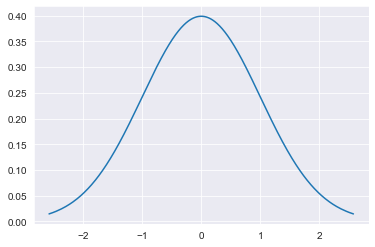

In [4]:
# plotting a normal distribution
x_qtiles = np.linspace(0.005,0.995,1000)
# getting the x-plots
x_plot = sp.norm.ppf(x_qtiles)
y_plot = sp.norm.pdf(x_plot)
sns.set_style('darkgrid')
ax_ = sns.lineplot(x=x_plot,y=y_plot)


### Problem 3 - Rao-Blackwellization

In [99]:
# code to run Rao-Blacwellization
def Rao_Blackwell(x_pdf,y_pdf,x_y_pdf,n=1000,*args,**kwargs):
    # function to run R-B
    # x_pdf is the unconditional true density of X
    # y_pdf is the candidate density function
    # x_y_pdf is the conditional density of x given y. 
    # all pdfs need to be functions

    # first we simulate X directly
    x_val = x_pdf(n);
    x_bar = np.mean(x_val)
    x_bar_std = np.std(x_val)/np.sqrt(n)

    # next we simulate Y directly
    y_val = y_pdf(n);
    # we now get x_cond values
    x_cond = x_y_pdf(y_val,*args,**kwargs)
    # we then estimate the mean and variance
    x_bar_cond =np.mean(x_cond)
    x_bar_cond_std = np.std(y_val)/np.sqrt(n)
    results = {'f(x)': pd.Series({'mean':x_bar,'mstd':x_bar_std}),'Rao-Black':pd.Series({'mean':x_bar_cond,'mstd':x_bar_cond_std})}
    return pd.DataFrame(results)

In [100]:
# part (a)
# gather the pdfs
x_pdf_a = lambda n: sp.nbinom.rvs(5,0.5,size=n)
y_pdf_a = lambda n: sp.gamma.rvs(a=5,scale=1,size=n)
def x_y_pdf_a(y):
    results = np.zeros(len(y))
    for iy,y_ in enumerate(y):
        results[iy]=sp.poisson.rvs(mu=y_,size=1)
    return results

prob_3a = Rao_Blackwell(x_pdf_a,y_pdf_a,x_y_pdf_a,n=1000)
print(prob_3a)
print(prob_3a.to_latex()) 

f(x)  Rao-Black
mean  5.103000   5.096000
mstd  0.101904   0.072338
\begin{tabular}{lrr}
\toprule
{} &      f(x) &  Rao-Black \\
\midrule
mean &  5.103000 &   5.096000 \\
mstd &  0.101904 &   0.072338 \\
\bottomrule
\end{tabular}



In [101]:
# part (b)
# gather pdfs
x_pdf_b = lambda n: sp.t.rvs(loc=0,df=2,size=n)
y_pdf_b = lambda n: sp.gamma.rvs(a=1,scale=1,size=n)
def x_y_pdf_b(y):
    results = np.zeros(len(y))
    for iy,y_ in enumerate(y):
        results[iy]=sp.norm.rvs(loc=0,scale=pow(y_,0.5))
    return results
prob_3b = Rao_Blackwell(x_pdf_b,y_pdf_b,x_y_pdf_b,n=1000)
print(prob_3b)
print(prob_3b.to_latex())

f(x)  Rao-Black
mean  0.021299   0.005985
mstd  0.073841   0.031468
\begin{tabular}{lrr}
\toprule
{} &      f(x) &  Rao-Black \\
\midrule
mean &  0.021299 &   0.005985 \\
mstd &  0.073841 &   0.031468 \\
\bottomrule
\end{tabular}



In [102]:
# part (c)
# for n in binomial we will set to 100
nbin = 100
x_pdf_c = lambda n: sp.betabinom.rvs(a=1,b=5,n=nbin,size=n)
y_pdf_c = lambda n: sp.beta.rvs(a=1,b=5,size=n)
def x_y_pdf_c(y):
    results = np.zeros(len(y))
    for iy,y_ in enumerate(y):
        results[iy]=sp.binom.rvs(n=nbin,p=y_,size=1)
    return results

prob_3c = Rao_Blackwell(x_pdf_c,y_pdf_c,x_y_pdf_c,n=1000)
print(prob_3c)
print(prob_3c.to_latex())

f(x)  Rao-Black
mean  16.345000   16.83200
mstd   0.441588    0.00451
\begin{tabular}{lrr}
\toprule
{} &       f(x) &  Rao-Black \\
\midrule
mean &  16.345000 &   16.83200 \\
mstd &   0.441588 &    0.00451 \\
\bottomrule
\end{tabular}




### Problem 4 - Antithetic variables

In [81]:
# create simulation engine that runs k-samples of n-draws (with antithetic variable creation)
def anti_thetic_sim(dist_kernel,nobs=10000,ksim=100,*args,**kwargs):
    x_means = np.zeros(ksim)
    x_meds = np.zeros(ksim)
    x_y_means = np.zeros(ksim)
    x_y_meds = np.zeros(ksim)

    for k_ in range(ksim):

        x = dist_kernel.rvs(size=nobs)
        u = dist_kernel.cdf(x)
        # creating antithetic variabls
        y = dist_kernel.ppf(1-u)
        
        # combining the vectors
        x_y = np.concatenate((x,y))
        x_means[k_] = np.mean(x)
        x_meds[k_] = np.median(x)

        x_y_means[k_] = np.mean(x_y)
        x_y_meds[k_] = np.median(x_y)

        # computing means and medians
    draws = pd.DataFrame({'x_means':pd.Series(x_means),'x_meds':pd.Series(x_meds),
                            'x_y_means':pd.Series(x_y_means),'x_y_meds':pd.Series(x_y_meds)})
    # get results
    results = pd.DataFrame({'mean':draws.mean(),'std':draws.std(),'max':draws.max(),'min':draws.min()})
    return results


def plot_pdf(dist_kernel):
    # function to plot a distribution kernel
    x_qtiles = np.linspace(0.005,0.995,1000)
    # getting the x-plots
    x_plot = dist_kernel.ppf(x_qtiles)
    y_plot = dist_kernel.pdf(x_plot)
    ax_ = sns.lineplot(x=x_plot,y=y_plot)
    ax_.set_ylabel('f(x)')
    ax_.set_xlabel('x')
    return ax_



,mean,std,max,min
x_means,-1.467481e-02,4.755475e+00,2.339522e+01,-1.944376e+01
x_meds,2.075534e-03,1.603045e-02,5.528431e-02,-4.469773e-02
x_y_means,8.135083e-13,1.533210e-11,1.368209e-10,-5.459842e-11
x_y_meds,1.110223e-18,3.345588e-17,1.110223e-16,-1.110223e-16


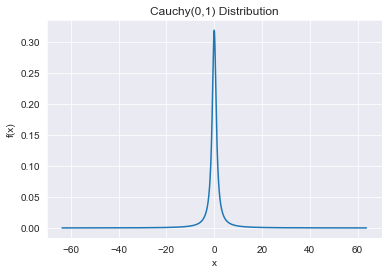

In [82]:
# 4(a)
# getting cauchy distribution
dist_4a = sp.cauchy()
ax_4a = plot_pdf(dist_4a)
ax_4a.set_title('Cauchy(0,1) Distribution')
# running simulation with antithetic variables
results_4a = anti_thetic_sim(dist_4a)
results_4a

In [83]:
print(results_4a.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          mean &           std &           max &           min \\
\midrule
x\_means   & -1.467481e-02 &  4.755475e+00 &  2.339522e+01 & -1.944376e+01 \\
x\_meds    &  2.075534e-03 &  1.603045e-02 &  5.528431e-02 & -4.469773e-02 \\
x\_y\_means &  8.135083e-13 &  1.533210e-11 &  1.368209e-10 & -5.459842e-11 \\
x\_y\_meds  &  1.110223e-18 &  3.345588e-17 &  1.110223e-16 & -1.110223e-16 \\
\bottomrule
\end{tabular}



,mean,std,max,min
x_means,5.063715e-05,1.274312e-02,2.926908e-02,-3.347791e-02
x_meds,9.366337e-06,1.088420e-02,2.578983e-02,-2.215470e-02
x_y_means,7.986500e-18,2.597577e-16,2.116529e-15,-8.625989e-16
x_y_meds,-1.109596e-18,2.492970e-17,5.556536e-17,-5.552470e-17


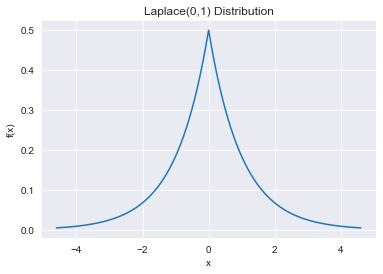

In [84]:
# problem 4(b)
dist_4b = sp.laplace()
ax_4b = plot_pdf(dist_4b)
ax_4b.set_title('Laplace(0,1) Distribution')
# running simulation with antithetic variables
results_4b = anti_thetic_sim(dist_4b)
results_4b


In [86]:
print(results_4b.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          mean &           std &           max &           min \\
\midrule
x\_means   &  5.063715e-05 &  1.274312e-02 &  2.926908e-02 & -3.347791e-02 \\
x\_meds    &  9.366337e-06 &  1.088420e-02 &  2.578983e-02 & -2.215470e-02 \\
x\_y\_means &  7.986500e-18 &  2.597577e-16 &  2.116529e-15 & -8.625989e-16 \\
x\_y\_meds  & -1.109596e-18 &  2.492970e-17 &  5.556536e-17 & -5.552470e-17 \\
\bottomrule
\end{tabular}



,mean,std,max,min
x_means,3.301688e-03,1.646109e-02,4.811810e-02,-3.635257e-02
x_meds,2.257817e-03,1.497923e-02,3.546311e-02,-3.131086e-02
x_y_means,9.732848e-13,6.761884e-12,1.935453e-11,-1.531887e-11
x_y_meds,-1.633519e-18,5.446420e-17,1.180290e-16,-1.160706e-16


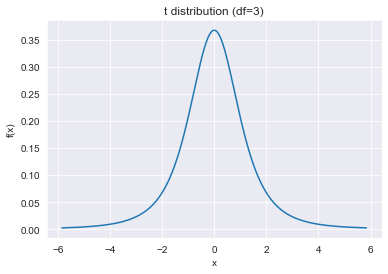

In [85]:
# problem 4c
dist_4c = sp.t(df=3)
ax_4c = plot_pdf(dist_4c)
ax_4c.set_title('t distribution (df=3)')
# running simulation with antithetic variables
results_4c = anti_thetic_sim(dist_4c)
results_4c


In [88]:
print(results_4c.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          mean &           std &           max &           min \\
\midrule
x\_means   &  3.301688e-03 &  1.646109e-02 &  4.811810e-02 & -3.635257e-02 \\
x\_meds    &  2.257817e-03 &  1.497923e-02 &  3.546311e-02 & -3.131086e-02 \\
x\_y\_means &  9.732848e-13 &  6.761884e-12 &  1.935453e-11 & -1.531887e-11 \\
x\_y\_meds  & -1.633519e-18 &  5.446420e-17 &  1.180290e-16 & -1.160706e-16 \\
\bottomrule
\end{tabular}

